We have stored all the NAAMES data (2015-2018) to Azure Cloud Storage and to read it we will use the Python API. 

ifcb storage account -> naames container -> NAAMES_ml folder

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import imageio
import getpass

import azure.storage.blob
from azure.storage.blob import BlobServiceClient, BlobClient, ContainerClient

In [8]:
connection_string = getpass.getpass()

 ········


In [9]:
container_client = azure.storage.blob.ContainerClient.from_connection_string(
    connection_string, container_name="naames"
)

In [10]:
# we limit to a subfolder to test the functionality
blobs_list = container_client.list_blobs(name_starts_with='NAAMES_ml/D20151102T161705_IFCB107')

In [11]:
blobs_list

<iterator object azure.core.paging.ItemPaged at 0x7a74e07ff1d0>

In [12]:
container_name = 'naames'
account_name = 'ifcb'

In [13]:
url_prefix = f"https://{account_name}.blob.core.windows.net/{container_name}/"

In [14]:
csv_url = url_prefix + 'image-file-directory.csv'

In [17]:
# note this cell takes a little time
inventory_df = pd.read_csv(csv_url)
inventory_df

,file_name,class_raw,high_group,missing_high_group,id,lat,long,Area,Biovolume,ConvexArea,...,ScatInt,FluoInt,ScatPeak,FluoPeak,NumberOfROIinTrigger,missing_meta_data,ESDA_exclude,excluded_1,set,binary_label
0,IFCB107D20151104T112022P00433_Unicellular.png,Unicellular,Other,False,IFCB107D20151104T112022P00433,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,True,False,1,train,plankton
1,IFCB107D20151104T114135P00194_Unicellular.png,Unicellular,Other,False,IFCB107D20151104T114135P00194,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,True,False,1,train,plankton
2,IFCB107D20151104T114135P00246_Unicellular.png,Unicellular,Other,False,IFCB107D20151104T114135P00246,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,True,False,1,train,plankton
3,IFCB107D20151104T124515P00027_Unicellular.png,Unicellular,Other,False,IFCB107D20151104T124515P00027,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,True,False,1,train,plankton
4,IFCB107D20151105T174918P00074_Dinophyceae.png,Dinophyceae,Dinoflagellate,False,IFCB107D20151105T174918P00074,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,True,False,1,train,plankton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998895,IFCB107D20180412T010113P00020_Ceratium.png,Ceratium,Dinoflagellate,False,IFCB107D20180412T010113P00020,40.348,-68.296,1507.093426,20001.839825,2501.816609,...,1.09682,0.36801,3.33541,1.37789,1.0,False,False,0,train,plankton
1998896,IFCB107D20180412T012434P00137_Ditylum.png,Ditylum,Diatom,False,IFCB107D20180412T012434P00137,40.324,-68.387,4811.591696,91203.058213,6707.612457,...,3.49742,1.77298,3.35693,3.31523,1.0,False,False,0,train,plankton
1998897,IFCB107D20180412T012434P00348_Ditylum.png,Ditylum,Diatom,False,IFCB107D20180412T012434P00348,40.324,-68.387,2446.626298,30443.529921,3317.560554,...,2.46922,0.90272,3.35900,2.21282,1.0,False,False,0,train,plankton
1998898,IFCB107D20180412T021117P00330_Ceratium.png,Ceratium,Dinoflagellate,False,IFCB107D20180412T021117P00330,40.273,-68.571,1500.951557,19808.704267,2787.802768,...,0.61201,0.04541,2.85538,0.37142,1.0,False,False,0,train,plankton


In [18]:
image = imageio.imread('https://ifcb.blob.core.windows.net/naames/NAAMES_ml/D20151102T161705_IFCB107/IFCB107D20151102T161705P00002.png')

/tmp/ipykernel_1134/2980670981.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread('https://ifcb.blob.core.windows.net/naames/NAAMES_ml/D20151102T161705_IFCB107/IFCB107D20151102T161705P00002.png')


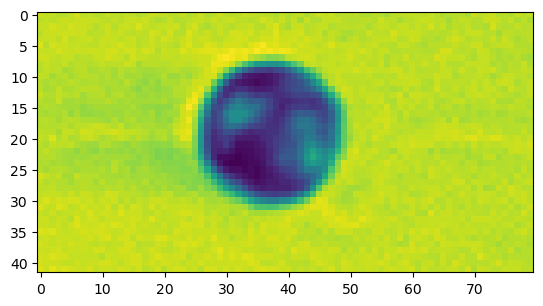

In [20]:
#example visualization of an image
plt.imshow(image)

In [21]:
# attach the azure url
blob_urls = (f"https://{account_name}.blob.core.windows.net/{container_name}/{blob.name}" for blob in blobs_list)

In [22]:
blob_urls

<generator object <genexpr> at 0x7a749d496890>

In [ ]:
# this will take time, maybe ~40 min
%%time
dataset = []
failed_urls = []
for blob_url in blob_urls:
    # print(blob_url)
    # select 'png'
    if 'png' in blob_url:
        try:
            image = imageio.imread(blob_url)
            dataset.append(image)
        except Exception as e:
            failed_urls.append(blob_url)
            pass
        

In [ ]:
print(failed_urls)

In [ ]:
len(dataset)

In [ ]:
# show an image

In [ ]:
plt.imshow(dataset[0])

In [ ]:
dataset[0]